In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model
from sklearn import compose

# Target data with exponential distribution

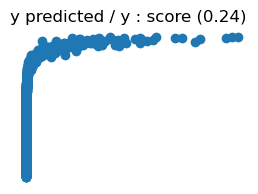

In [146]:
X = np.linspace(1,10,1000).reshape(-1, 1)
y = np.exp(2 * (X+ 0.2* np.random.randn(*X.shape))).ravel()

mod = linear_model.LinearRegression()
mod.fit(X, y)
score = mod.score(X, y)

plt.figure(figsize=(3,2)); plt.suptitle(f"y predicted / y : score ({score:.2})"); plt.axis('off')
plt.scatter(x=y, y=mod.predict(X)); plt.show()

# Log transformer before modeling

In [129]:
log_transformer = preprocessing.FunctionTransformer(func=np.log, inverse_func=np.exp, check_inverse=True)

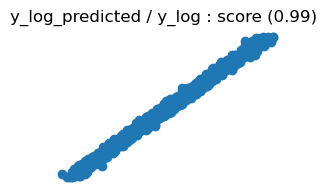

In [153]:
y_log = log_transformer.transform(y)
mod = linear_model.LinearRegression()
mod.fit(X, y_log)
score = mod.score(X, y_log)

plt.figure(figsize=(3,2)); plt.suptitle(f"y_log_predicted / y_log : score ({score:.2})"); plt.axis('off')
plt.scatter(x=y_log, y=mod.predict(X)); plt.show()

# TransformerTargetRegressor in modeling

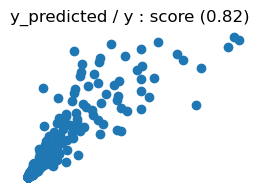

In [152]:
mod = compose.TransformedTargetRegressor(
    regressor=linear_model.LinearRegression(),
    transformer=log_transformer)
mod.fit(X, y)
score = mod.score(X, y)

plt.figure(figsize=(3,2)); plt.suptitle(f"y_predicted / y : score ({score:.2})"); plt.axis('off')
plt.scatter(x=y, y=mod.predict(X)); plt.show()

* Why is the score lower ? It looks like using the raw scale instead of the logarithmic scale.  
* As described in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.compose.TransformedTargetRegressor.html), corresponding to the following :

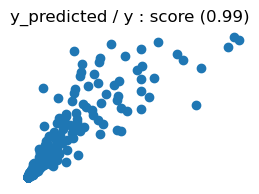

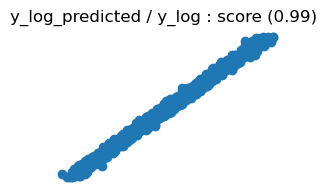

In [151]:
mod = linear_model.LinearRegression()
mod.fit(X, y_log)
y_pred = log_transformer.inverse_transform(mod.predict(X))
score = mod.score(X, y_log)

plt.figure(figsize=(3,2)); plt.suptitle(f"y_predicted / y : score ({score:.2})"); plt.axis('off')
plt.scatter(x=y, y=y_pred); plt.show()

plt.figure(figsize=(3,2)); plt.suptitle(f"y_log_predicted / y_log : score ({mod.score(X, y_log):.2})"); plt.axis('off')
plt.scatter(x=y_log, y=mod.predict(X)); plt.show()